## This is a customer classification project. 
### The goal is to develop a machine learning model to predict whether customer will agree to subscribe to a term deposit or not based on customer data 

### Explotratory data analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
# Loading the dataset 
data = pd.read_csv('BankCustomerData.csv')
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [2]:
# View descriptive statistics of numberical data 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [4]:
# Check for Null values 
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [5]:
# Check for duplicates 
data.duplicated().sum()

0

In [6]:
len(data.columns)

17

### Since our data has no Null values and no Duplicates we can move on and get better knowledge about each feature

In [7]:
# creating a function to see distribution of all features 
def plot_distributions(df):
    plt.figure(figsize=(28,40))
    b = 0 
    for i in df.columns:
        b+=1
        plt.subplot(6,6,b)
        plt.hist(df[i])
        plt.title(i)
        
# create function to visualize distribution of one feature 
def plot_idividual( column_name,df= data):
    plt.figure(figsize=(15,10))
    plt.hist(df[column_name])
    plt.title(column_name)
        



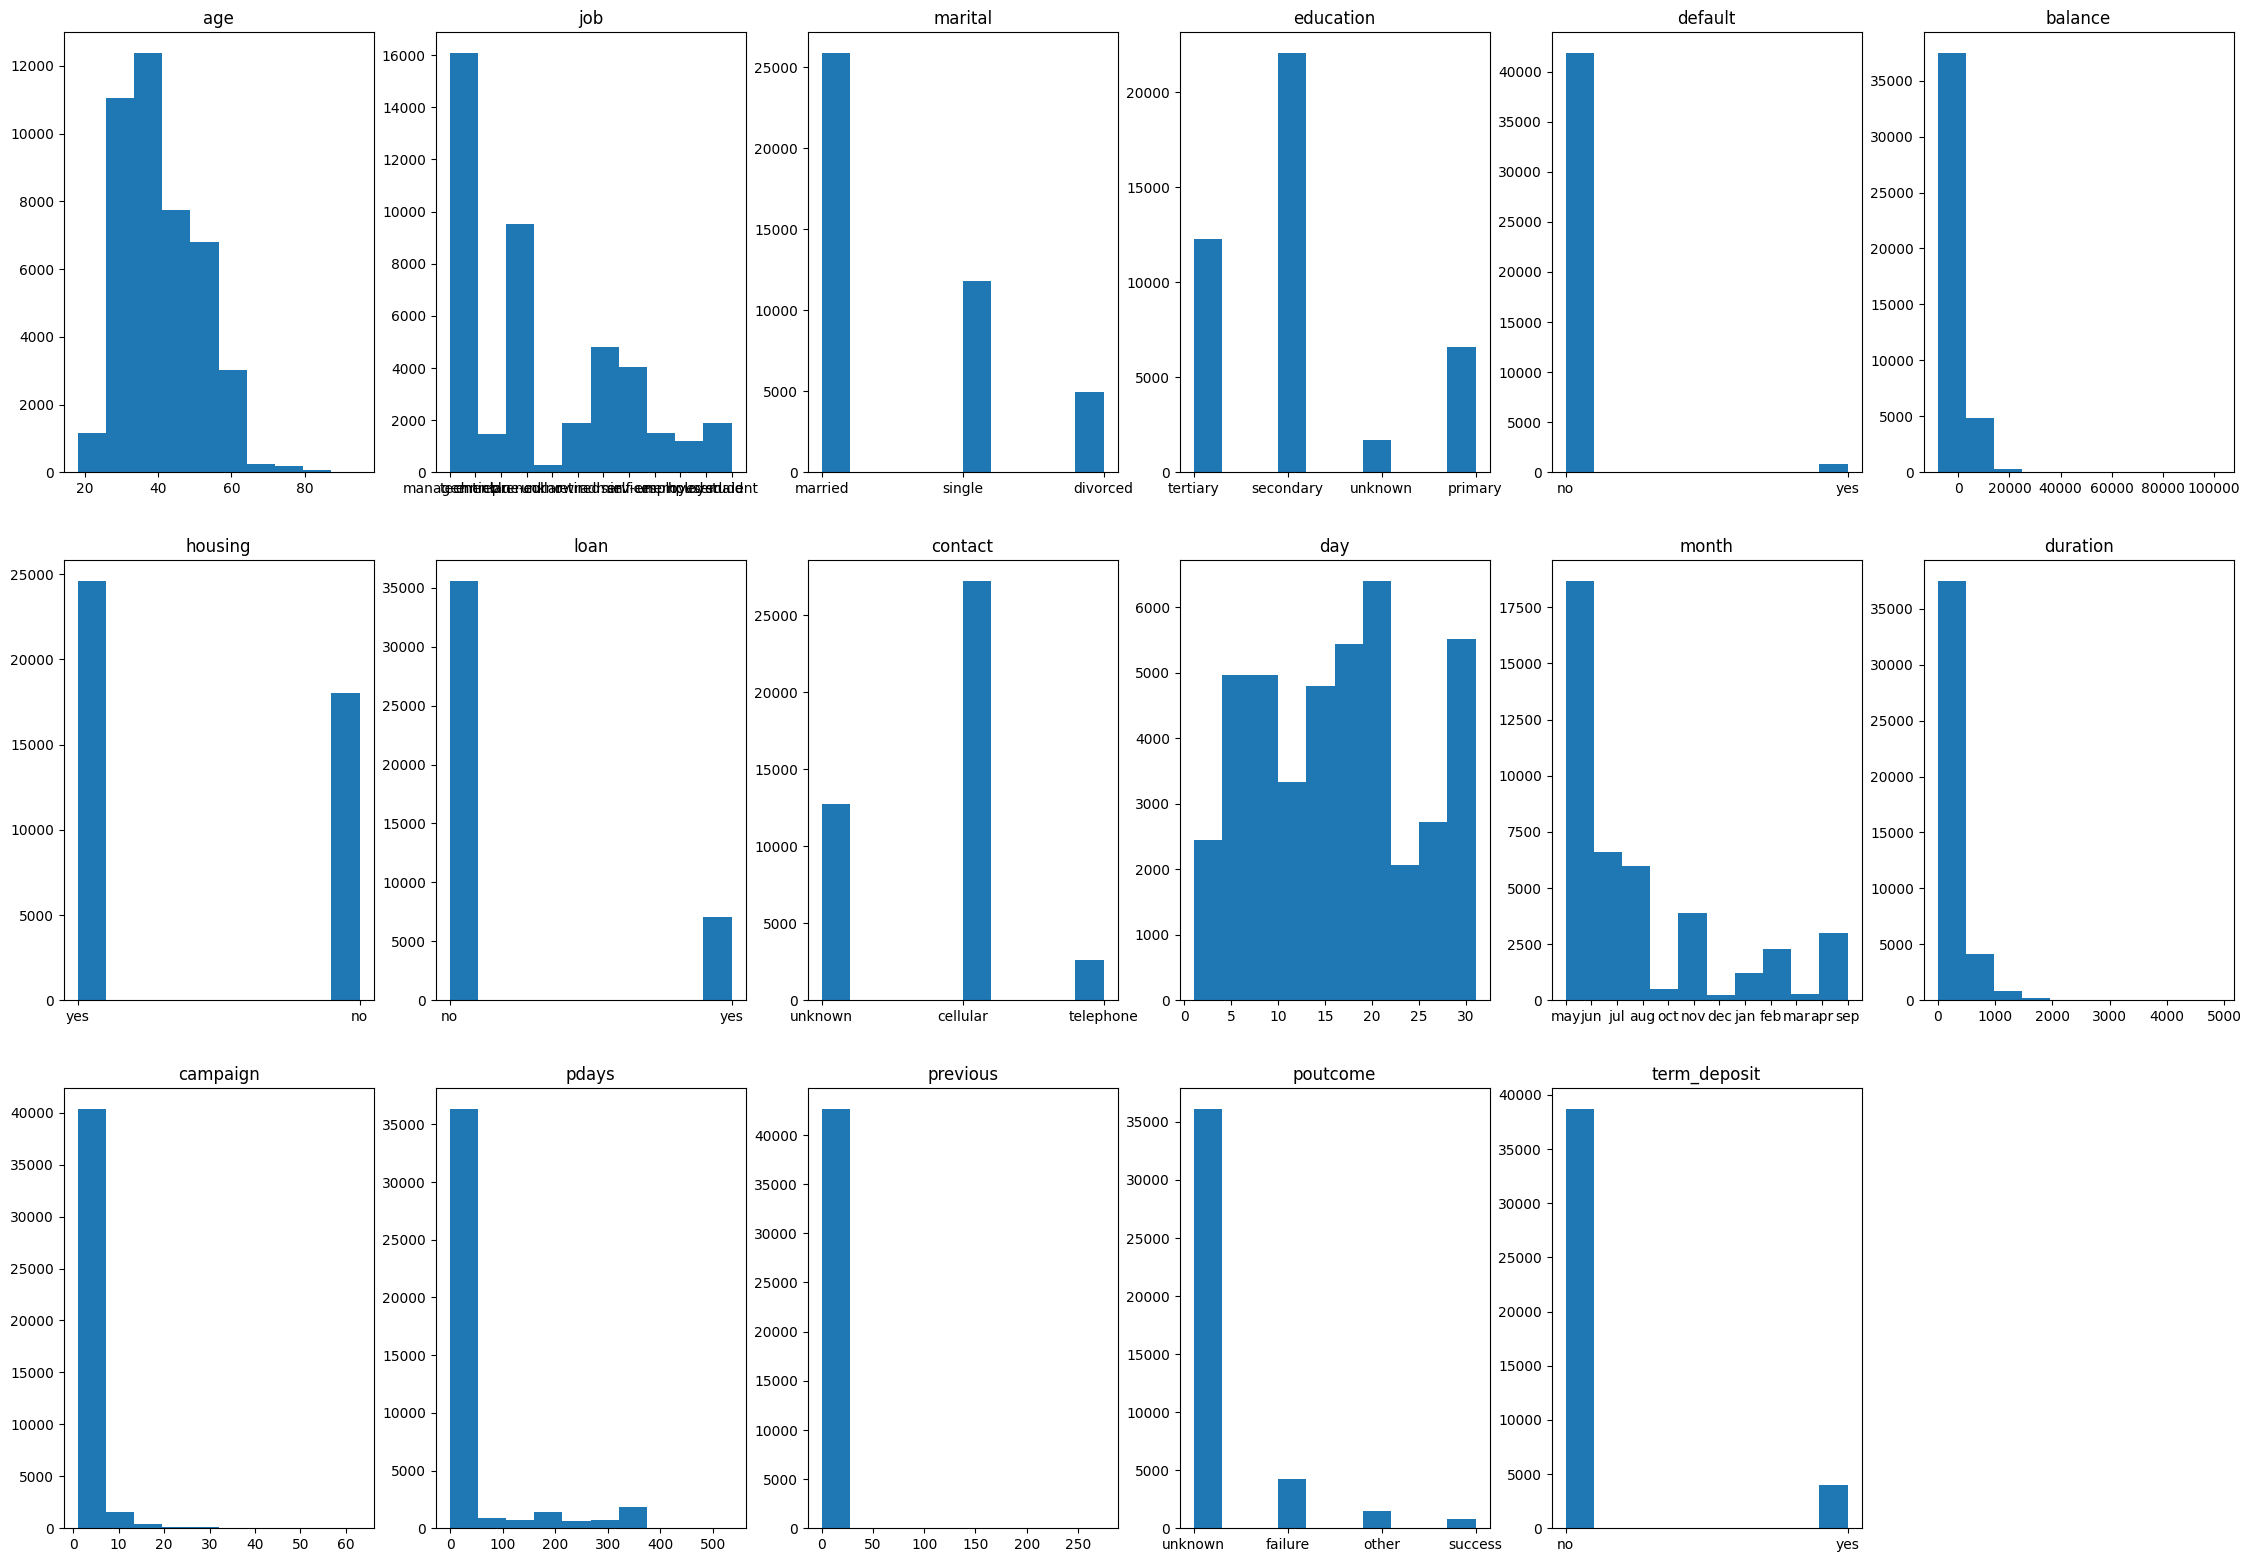

In [8]:
# Plot distibutio of features 
plot_distributions(data)

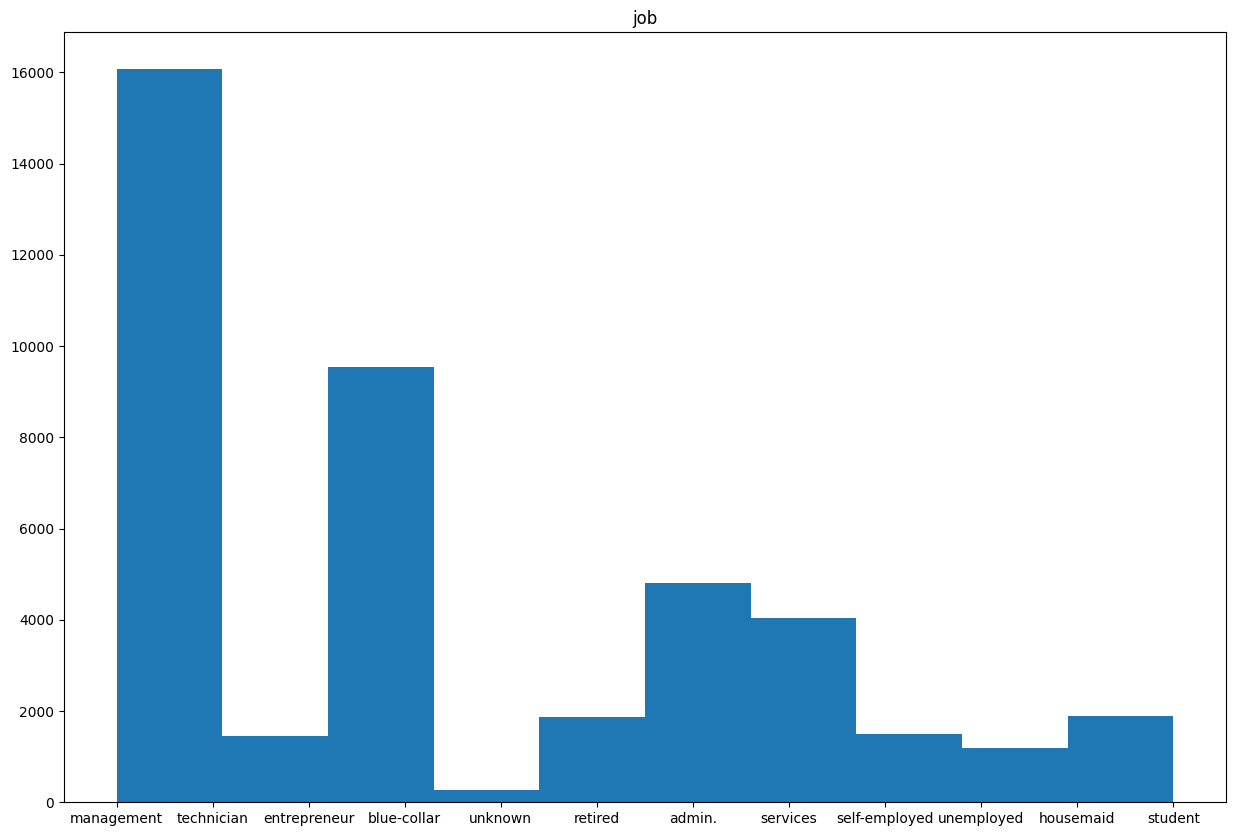

In [9]:
# Plot job feature to see it in more details 
plot_idividual('job')

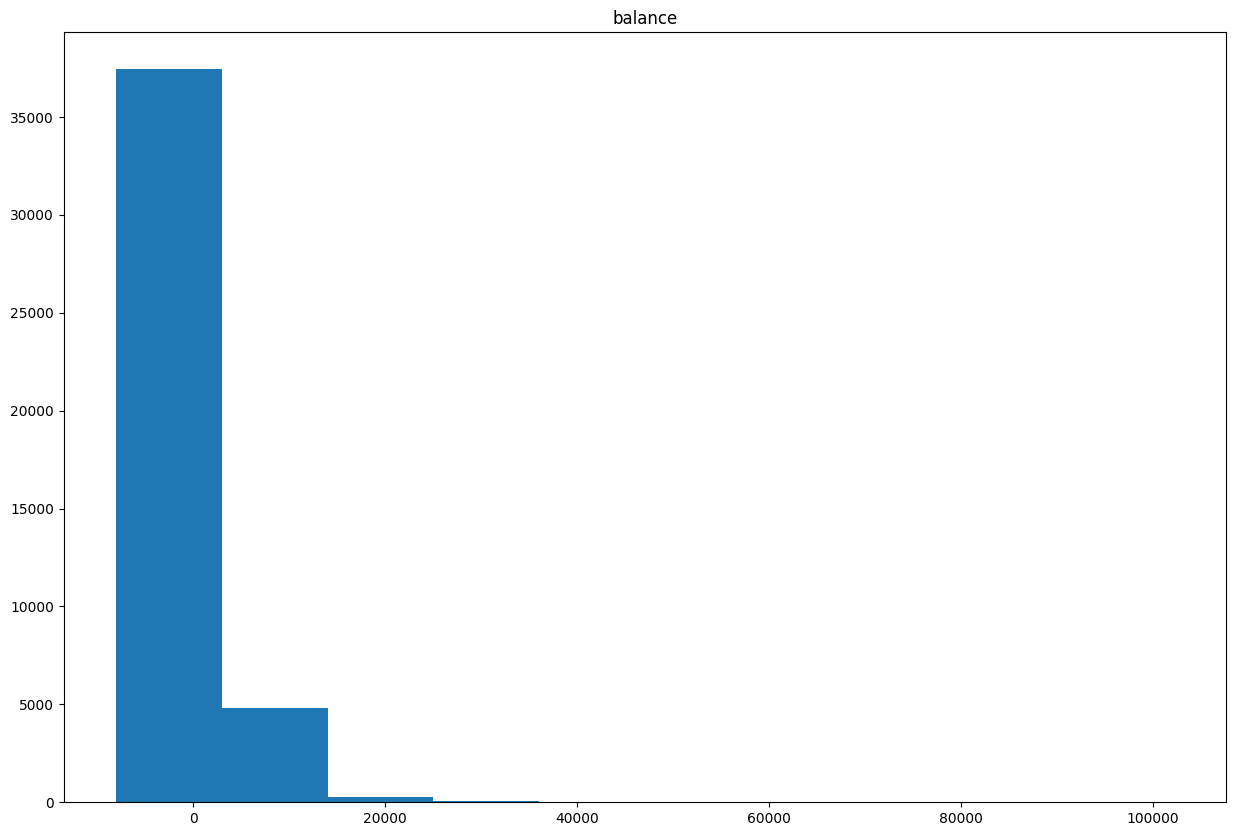

In [10]:
# plot balance to see it in more details 
plot_idividual('balance')

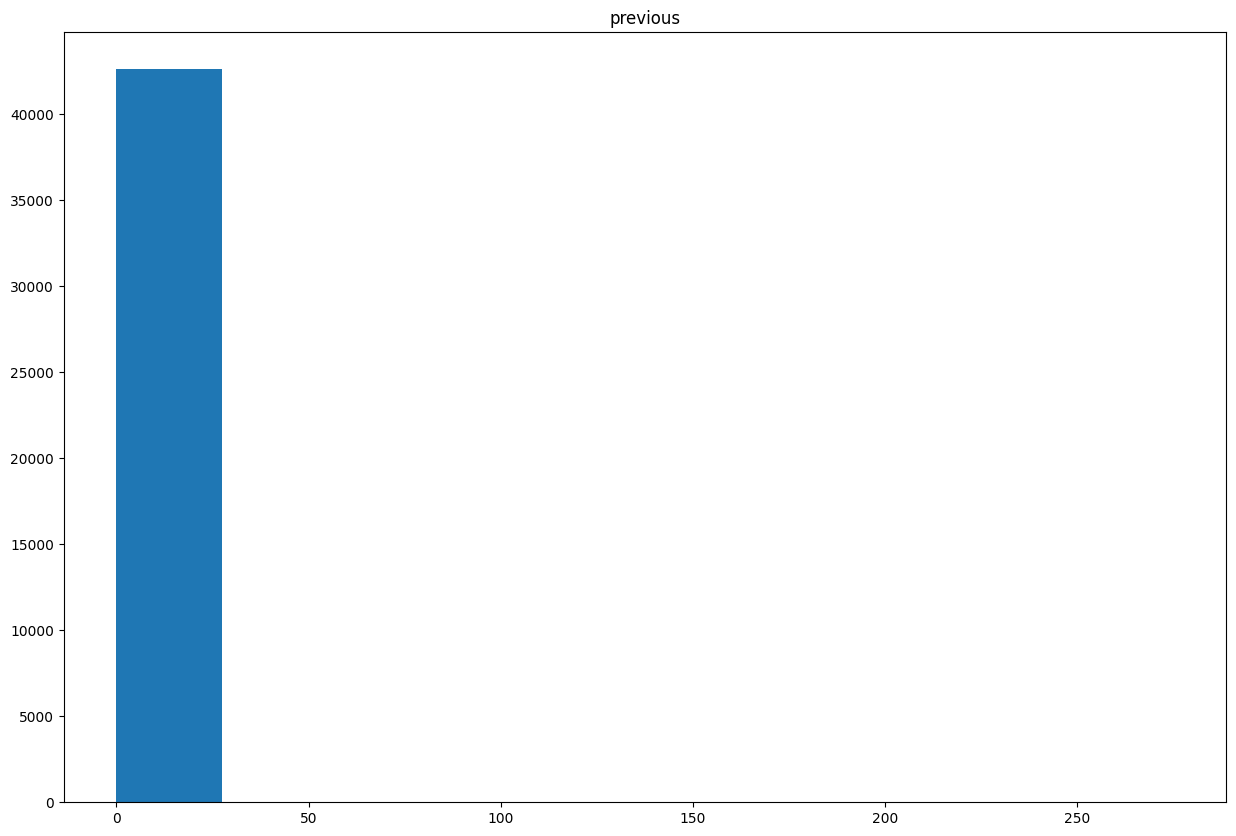

In [11]:
plot_idividual('previous')

In [12]:
data['previous'].describe()

count    42639.000000
mean         0.465442
std          2.166705
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [13]:

data[data['previous'] > 15]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
24295,35,technician,divorced,tertiary,no,1718,yes,yes,cellular,17,nov,74,1,167,16,other,no
24596,56,management,single,primary,no,109,no,yes,telephone,17,nov,124,1,129,18,other,no
24624,57,technician,married,secondary,no,1158,no,no,unknown,17,nov,204,2,109,21,other,no
26657,39,management,divorced,tertiary,no,155,yes,no,cellular,20,nov,20,6,153,26,failure,no
26668,51,entrepreneur,married,secondary,no,653,yes,no,cellular,20,nov,16,9,112,37,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42336,35,technician,married,secondary,no,4922,yes,no,cellular,17,nov,393,4,201,17,other,yes
42422,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other,no
42497,29,student,single,secondary,no,459,no,no,cellular,15,dec,279,3,189,19,other,yes
42536,40,admin.,single,secondary,no,782,yes,no,cellular,21,dec,94,5,202,17,failure,no


In [14]:
# Get count of each value in term_deposit
term_deposit = np.array([len(data[data['term_deposit']== 'no']), len(data[data['term_deposit'] == 'yes'])])
mylabel = ['no','yes']
# Get precentage of each value 
myprec = np.array([str(round(term_deposit[0] / len(data['term_deposit']),2)) + '%', 
                    str(round(term_deposit[1] / len(data['term_deposit']),2)) + '%'])



Text(0.5, 1.0, 'Term deposit results')

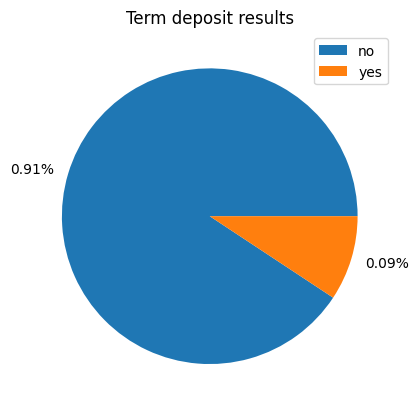

In [15]:
# Visualize yes & no distribution

plt.pie(term_deposit, labels = myprec)
plt.legend(mylabel)
plt.title('Term deposit results')


## From this histograms we can understand two things 
* ### Prediction label is not equely represented (90/10), which can lead to bad model performance 
* ### Labels : balance, duration, pdays, previous , campaign are higly skewed , which can also result in poor model performance 

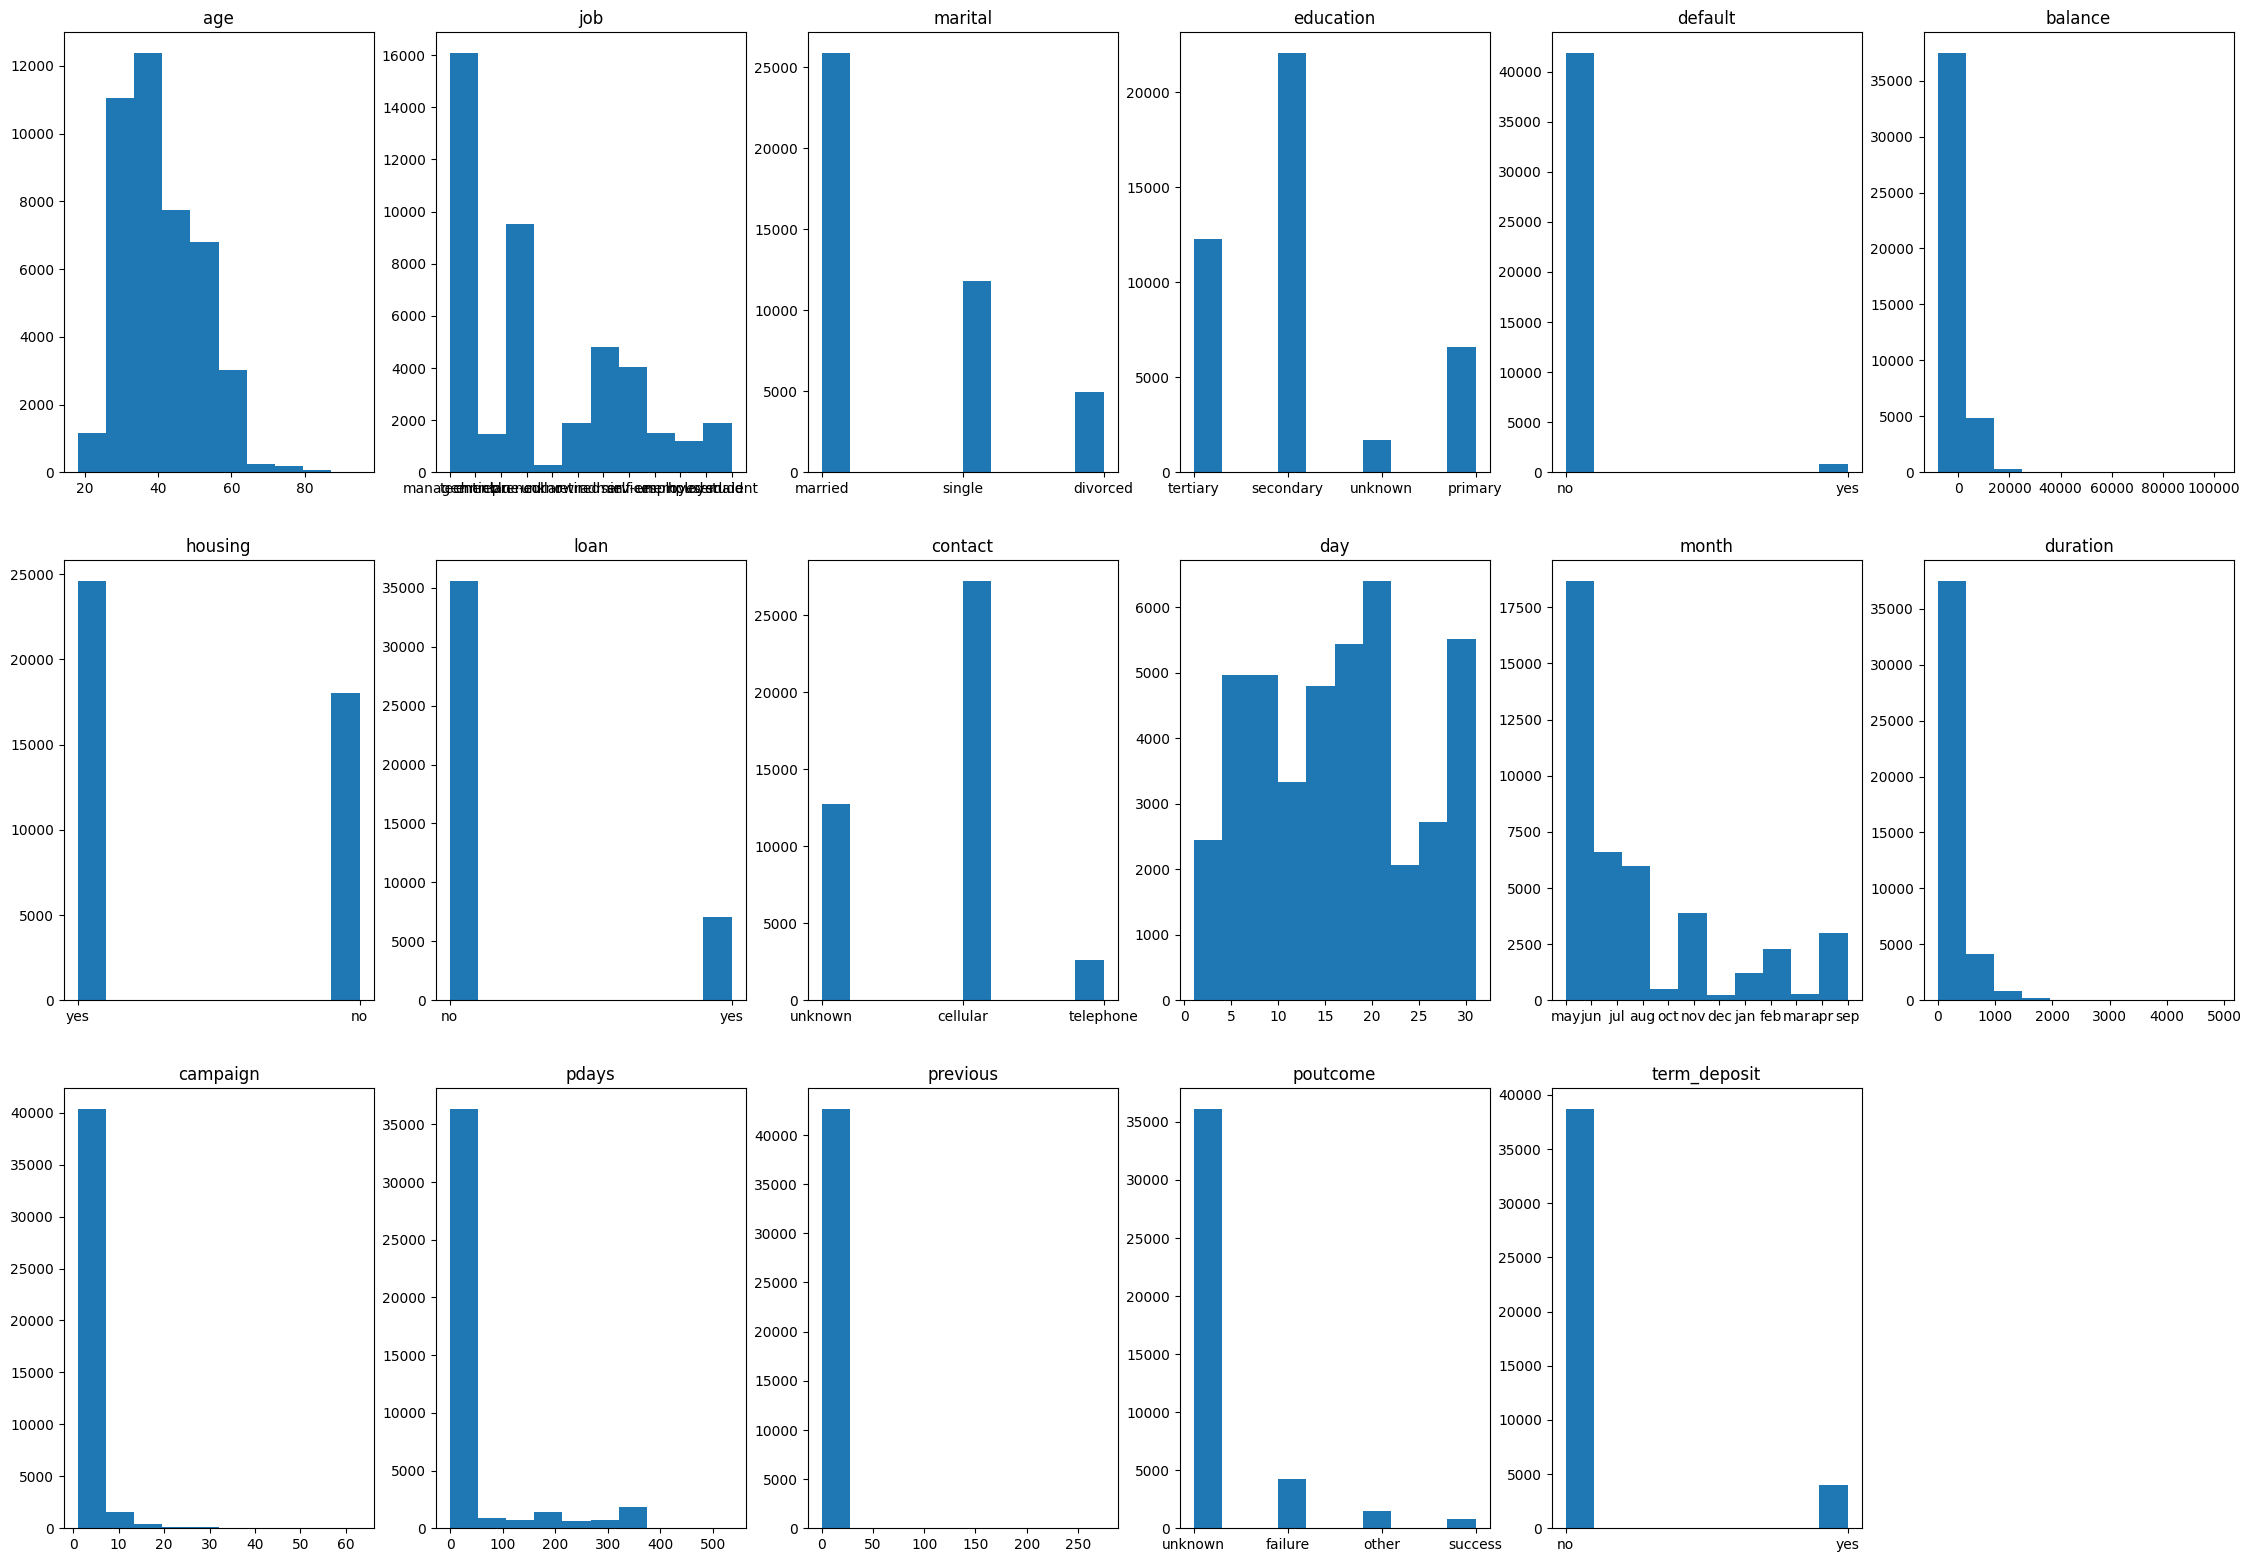

In [16]:
plot_distributions(data)

## Data preprocessing 

In [17]:
y = pd.get_dummies(data['term_deposit'])['yes']


In [60]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split

# Shuffle the data
data_shuffled =  data.sample(frac=1, random_state = 42).reset_index(drop = True)

# Create X, y values 
X = data_shuffled.drop(['term_deposit','duration'], axis = 1 )
y = pd.get_dummies(data['term_deposit'])['yes']


def scale(X,y):
    # Create a column transformer 
    ct = make_column_transformer(
        (MinMaxScaler(),['age','day']), # Transforms data in values between 0 and 1
        (RobustScaler(), ['balance','campaign','pdays', 'previous']), # We use RobustScalar because we assume high level of outliers because of higly skewed data. It works with quartiles 
        (OneHotEncoder(),['job','marital','education','default','housing','loan','contact','month','poutcome']) # incode categorical data 
    )

    

    # Split the data in train and test sets 
    X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

    # Fit column transformer 
    ct.fit(X_train)

    # Transform the data
    X_train_transformed = pd.DataFrame(ct.transform(X_train)) 
    X_test_transformed  = pd.DataFrame(ct.transform(X_test))
    return  X_train_transformed,  X_test_transformed, y_train, y_test  

    


In [61]:

X_train_transformed, X_test_transformed , y_train, y_test  = scale(X,y)

In [62]:
cor = X_train_transformed.corr()
cor.style.background_gradient(cmap = 'coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,-0.007015,0.088068,0.009661,-0.049842,-0.024217,-0.050126,-0.042515,0.027612,0.081859,-0.012368,0.401432,-0.002084,-0.062994,-0.179767,-0.063626,0.003624,0.044367,0.161955,0.274494,-0.415638,0.183084,-0.096316,-0.070261,0.072087,0.015125,-0.015125,0.190683,-0.190683,0.007421,-0.007421,-0.065718,0.152614,-0.011399,-0.032810,0.087422,0.031551,-0.013128,-0.016608,0.010992,0.061113,0.006660,-0.139401,0.036606,0.071106,0.037929,-0.019628,-0.030930,-0.007443,0.034962
1,-0.007015,1.000000,0.004865,0.166850,-0.098763,-0.054581,-0.009627,-0.024946,-0.003359,0.005253,0.017299,-0.008474,0.005991,-0.008292,-0.019078,0.033582,-0.001111,-0.009686,-0.001124,0.011981,-0.012273,-0.024009,-0.004999,0.024945,-0.000819,-0.010690,0.010690,0.033285,-0.033285,-0.009959,0.009959,0.020775,0.032442,-0.038862,0.049000,0.039922,-0.010545,-0.300871,0.254443,0.147748,-0.209611,-0.010885,-0.026659,0.101404,0.033599,-0.048998,-0.066514,-0.041762,-0.023949,0.085596
2,0.088068,0.004865,1.000000,-0.011259,-0.003314,0.009864,-0.025143,-0.046828,0.012901,0.001765,0.073163,0.031109,0.012468,-0.036432,0.000730,-0.013269,0.006544,0.011242,-0.023607,0.019246,-0.004099,-0.023131,-0.068771,0.086827,0.017196,0.069412,-0.069412,0.060812,-0.060812,0.079167,-0.079167,0.009655,0.034302,-0.028178,0.012392,0.009355,0.031521,-0.012770,-0.029428,-0.065754,0.037728,0.013577,-0.069713,0.127528,0.031060,0.023679,0.012319,0.003053,0.021501,-0.019729
3,0.009661,0.166850,-0.011259,1.000000,-0.079082,-0.029574,-0.019799,0.004148,0.001354,0.002120,0.016765,-0.024538,0.004652,-0.006322,-0.016103,0.017949,-0.016612,0.015225,-0.015786,0.031889,-0.023500,0.001753,-0.017642,0.013110,0.011527,-0.019062,0.019062,0.037960,-0.037960,-0.006485,0.006485,-0.028675,0.058309,-0.000615,-0.070250,0.153376,-0.014470,-0.026934,-0.062723,0.102498,0.041239,-0.007061,-0.075413,-0.090037,-0.047831,-0.029019,-0.086770,-0.018001,-0.043427,0.097396
4,-0.049842,-0.098763,-0.003314,-0.079082,1.000000,0.555491,0.022775,0.045906,-0.004954,-0.032604,-0.021769,-0.035529,-0.009721,0.020633,0.005229,-0.010698,-0.018976,-0.022573,0.002071,-0.020589,0.020990,-0.005028,0.031725,-0.025718,-0.012265,0.023148,-0.023148,-0.182834,0.182834,0.013040,-0.013040,0.230537,0.010425,-0.247259,0.157849,-0.115619,0.056705,0.070975,0.055269,-0.154453,-0.122494,-0.017051,0.124135,0.022765,0.033042,0.020486,0.743183,0.413630,0.181296,-0.897377
5,-0.024217,-0.054581,0.009864,-0.029574,0.555491,1.000000,0.015563,-0.000754,0.001150,-0.019071,0.011032,-0.024793,-0.001888,0.002739,0.014951,0.000487,-0.015541,-0.014470,0.001929,-0.015707,0.015764,-0.010157,0.002038,0.012402,-0.015319,0.013458,-0.013458,-0.091482,0.091482,0.001595,-0.001595,0.148125,0.028136,-0.170151,0.074994,-0.068929,0.050355,0.065689,0.066730,-0.107819,-0.075889,-0.005285,0.037503,0.059495,0.027542,0.033062,0.445621,0.371355,0.163971,-0.621825
6,-0.050126,-0.009627,-0.025143,-0.019799,0.022775,0.015563,1.000000,-0.190868,-0.067252,-0.060135,-0.183021,-0.075910,-0.068283,-0.115115,-0.046623,-0.160542,-0.060037,-0.027822,0.034663,-0.061885,0.042722,-0.108159,0.217455,-0.147820,-0.013934,0.008723,-0.008723,-0.042099,0.042099,-0.031552,0.031552,-0.004998,-0.006528,0.008677,0.021086,-0.074714,0.000279,0.001306,0.005307,0.016666,-0.003987,0.013158,0.030530,-0.006491,0.010522,0.005113,0.014026,0.011770,0.013827,-0.022804
7,-0.042515,-0.024946,-0.046828,0.004148,0.045906,-0.000754,-0.190868,1.000000,-0.101249,-0.090534,-0.275540,-0.114283,-0.102801,-0.173307,-0.070192,-0.241697,-0.090387,-0.041886,-0.065729,0.124523,-0.088842,0.348290,0.034449,-0.324115,0.021714,-0.007351,0.007351,-0.167614,0.167614,-0.008861,0.008861,-0.125878,-0.002363,0.133257,0.031706,-0.120732,-0.029530,-0.033684,-0.032644,-0.020365,0.022754,-0.033434,0.160973,-0.054192,-0.039485,-0.035285,0.015191,0.008783,-0.031680,-0.005484
8,0.027612,-0.003359,0.012901,0.00

### Removing higly corelated columns


In [20]:
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.220779,0.300000,0.053232,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.311688,0.033333,4.573384,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.220779,0.433333,-0.288973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.246753,0.200000,-0.327757,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.402597,0.600000,0.184030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34106,0.402597,1.000000,0.246388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34107,0.233766,0.566667,-0.140684,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34108,0.142857,0.333333,-0.299620,0.5,354.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34109,0.168831,0.733333,0.215209,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
X_train_trans_remov = X_train_transformed.drop([26,28,30,33,49], axis = 1)
X_test_trans_remov = X_test_transformed.drop([26,28,30,33,49], axis = 1)

### Model 1 (Nearal Network)

In [22]:
import tensorflow as tf 

In [23]:
y_train

16288    0
4498     0
13736    0
20512    0
21657    0
        ..
36064    0
32231    0
33934    0
30789    0
38441    0
Name: yes, Length: 34111, dtype: uint8

In [66]:
# set a randome seed 
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation ='relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#Fit the model
history = model_1.fit(X_train_transformed,
                    y_train,
                    epochs = 10,
                    validation_data = (X_test_transformed,y_test))



Epoch 1/10
1066/1066 [==============================] - 3s 3ms/step - loss: 0.3253 - accuracy: 0.9055 - val_loss: 0.3150 - val_accuracy: 0.9070
Epoch 2/10
1066/1066 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.9071 - val_loss: 0.3139 - val_accuracy: 0.9070
Epoch 3/10
1066/1066 [==============================] - 2s 2ms/step - loss: 0.3130 - accuracy: 0.9071 - val_loss: 0.3120 - val_accuracy: 0.9070
Epoch 4/10
1066/1066 [==============================] - 3s 3ms/step - loss: 0.3117 - accuracy: 0.9071 - val_loss: 0.3112 - val_accuracy: 0.9070
Epoch 5/10
1066/1066 [==============================] - 3s 3ms/step - loss: 0.3113 - accuracy: 0.9071 - val_loss: 0.3174 - val_accuracy: 0.9070
Epoch 6/10
1066/1066 [==============================] - 4s 4ms/step - loss: 0.3110 - accuracy: 0.9071 - val_loss: 0.3109 - val_accuracy: 0.9069
Epoch 7/10
1066/1066 [==============================] - 5s 5ms/step - loss: 0.3100 - accuracy: 0.9071 - val_loss: 0.3152 - val_accuracy:

<AxesSubplot:>

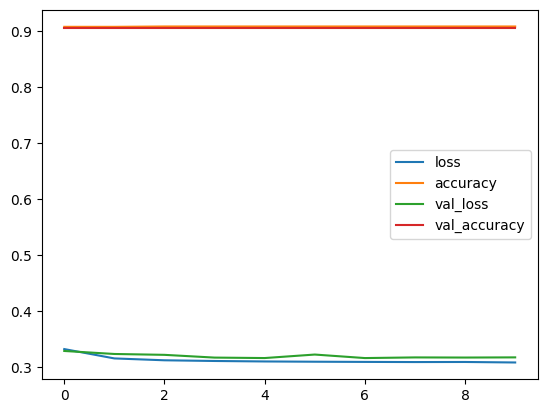

In [25]:
# PLot learning curve 
pd.DataFrame(history.history).plot()

### 90% accuracy from first epochs , wow , quit impressime , isn't it ? It's a bit supicious , so lets check how your model predits each class

In [26]:
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)
y_pred = model_1.predict(X_test_transformed)

def plot_confusion(y_test,y_pred):

    y_pred = tf.constant(y_pred)

    # Create the confusion matrix
    cm = confusion_matrix(y_test,tf.round(y_pred))
    cm_normal = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    n_classes = cm.shape[0]

    #prettifying 
    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes 
    classes = False

    if classes:
        labels = classes 
    else:
        labels = np.arange(cm.shape[0])



    #label the axes 
    ax.set(title = 'Confusion matrix',
            xlabel = 'Predicted label',
            ylabel = 'True label',
            xticks = np.arange(n_classes),
            yticks  = np.arange(n_classes),
            xticklabels = labels,
            yticklabels = labels)

    # Set x-axis labels to the bottom 
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for different colors 
    threshold = (cm.max() + cm.min()) / 2 

    # Plot the text on each cell 
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,f'{cm[i,j]}({cm_normal[i,j]*100:.1f}%)',
                horizontalalignment = 'center',
                color  = 'white' if cm[i,j] > threshold else "black",
                size = 15),

267/267 [==============================] - 0s 1ms/step


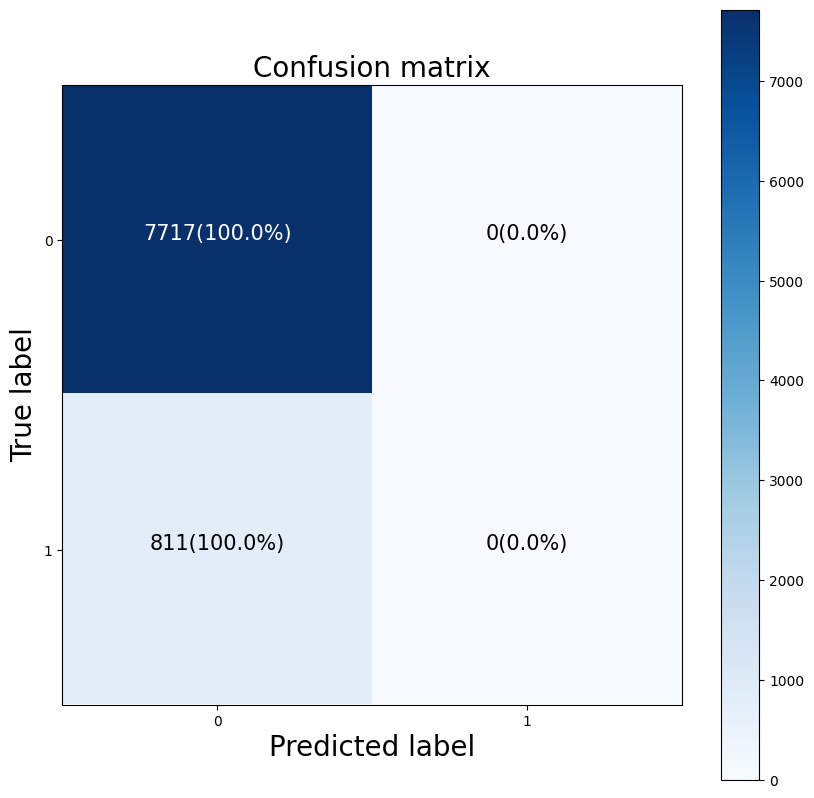

In [27]:
plot_confusion(y_test,y_pred)

In [42]:
# Show distribution of responses 
number_yes = len(data_shuffled[data_shuffled['term_deposit'] == 'yes'])
number_no = len(data_shuffled[data_shuffled['term_deposit'] == 'no'])

print(f"Number of rejected offers: {number_no}\n Number of acceped offers: {number_yes}")
print(data_shuffled['term_deposit'].unique())

Number of rejected offers: 38678
 Number of acceped offers: 3961
['no' 'yes']


In [64]:
# Create a new equely distributed data set 
data_negative  = pd.DataFrame(data_shuffled[data_shuffled['term_deposit'] == 'no'][:number_yes])
data_positive = pd.DataFrame(data_shuffled[data_shuffled['term_deposit'] == 'yes'])
data_new = pd.concat([data_negative,data_positive]).sample(frac=1 , random_state= 42).reset_index(drop = True)
data_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,32,management,single,tertiary,no,3283,no,no,cellular,12,aug,623,2,191,2,success,yes
1,55,management,divorced,tertiary,no,608,yes,no,cellular,7,may,161,2,-1,0,unknown,no
2,33,management,married,tertiary,no,442,yes,no,unknown,7,may,463,1,-1,0,unknown,no
3,64,management,married,tertiary,no,6251,no,no,telephone,5,feb,125,7,-1,0,unknown,no
4,55,management,married,tertiary,no,926,yes,no,cellular,17,nov,309,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,41,management,divorced,tertiary,no,3426,no,no,cellular,4,jun,102,2,297,3,failure,yes
7918,33,student,married,secondary,no,1536,no,no,cellular,9,nov,262,1,94,2,success,yes
7919,30,entrepreneur,married,primary,no,386,yes,no,cellular,15,may,253,4,-1,0,unknown,no
7920,52,unemployed,married,primary,no,959,no,no,telephone,30,jul,694,2,-1,0,unknown,yes


In [87]:
# Make new X ,y values 

X_new =data_new.drop(['term_deposit','duration'], axis = 1 )
y_new = pd.get_dummies(data_new['term_deposit'])['yes']

# Scale values 

X_train_scaled_new , X_test_scaled_new, y_train_new, y_test_new = scale(X_new, y_new) 

# Removing higly corelated tables 
X_train_scaled_new = X_train_scaled_new.drop([26,28,30,33,49], axis = 1)
X_test_scaled_new = X_test_scaled_new.drop([26,28,30,33,49], axis = 1)

## Create the same  model as the last time but with nicely distributed categories in target values 

In [88]:
from imblearn.keras import balanced_batch_generator
from imblearn.under_sampling import NearMiss
# set a randome seed 
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation ='relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    

    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



#Fit the model
history_new = model_2.fit(X_train_scaled_new,
                        y_train_new,
                        epochs = 30,
                        validation_data = (X_test_scaled_new,y_test_new))

Epoch 1/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.5641 - val_loss: 0.6629 - val_accuracy: 0.6120
Epoch 2/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6197 - val_loss: 0.6419 - val_accuracy: 0.6372
Epoch 3/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6404 - val_loss: 0.6468 - val_accuracy: 0.6372
Epoch 4/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6535 - val_loss: 0.6155 - val_accuracy: 0.6580
Epoch 5/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6182 - accuracy: 0.6584 - val_loss: 0.6102 - val_accuracy: 0.6694
Epoch 6/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6107 - accuracy: 0.6618 - val_loss: 0.6103 - val_accuracy: 0.6662
Epoch 7/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6177 - accuracy: 0.6662 - val_loss: 0.6403 - val_accuracy: 0.6580
Epoch 

In [89]:
y_prediction = model_2.predict(X_test_scaled_new)

50/50 [==============================] - 0s 1ms/step


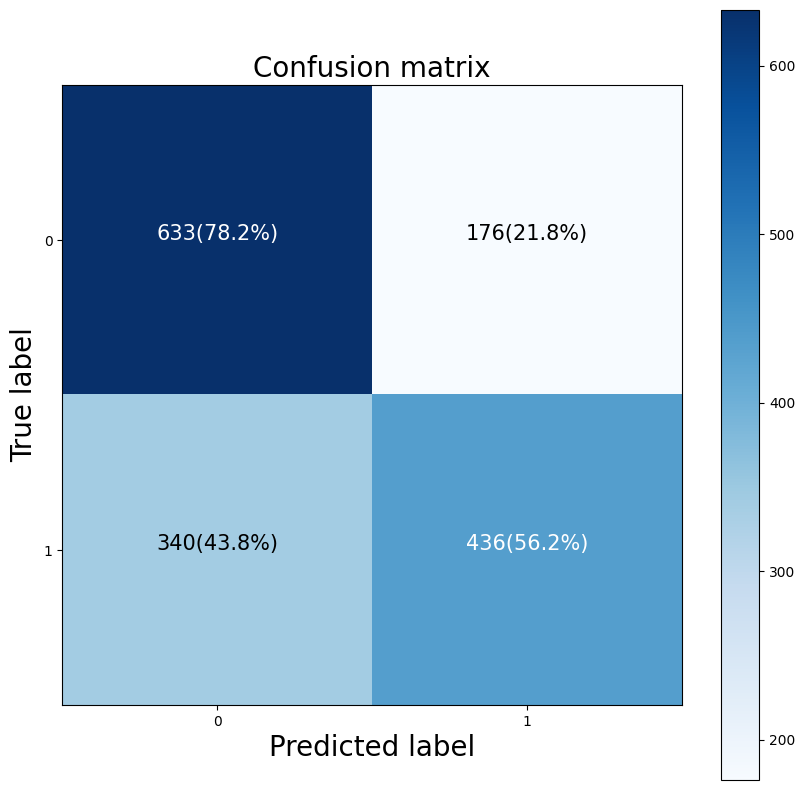

In [90]:
plot_confusion(y_test_new,y_prediction)

<AxesSubplot:>

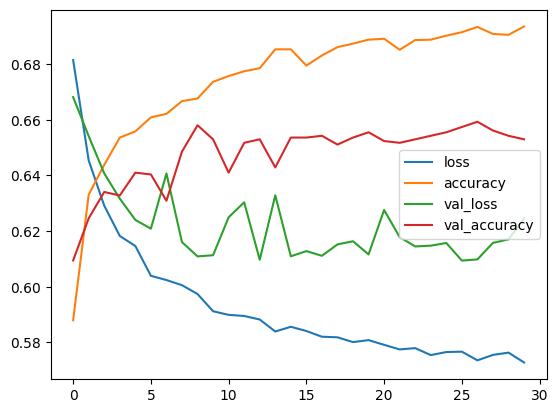

In [84]:
pd.DataFrame(history_new.history).plot()

## From above graph we can see that the model's validation  loss goes incosistenly it may be a sign of :
* Too high leraning rate 
* Overfitting of the model 


### Find optimal learning rate 

In [96]:
# Make the model with learning rate scheduler callback

# Set random seed 
from gc import callbacks


tf.random.set_seed(42)

# Create the model (We will use the same base as in the last model)

model_lr = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(5, activation ='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_lr.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Create a learning rate scheduler callback

ler_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20) )

# Fit the model
history_lr = model_lr.fit(X_train_scaled_new,
                            y_train_new,
                            epochs = 100,
                            validation_data = (X_test_scaled_new,y_test_new),
                            callbacks = [ler_scheduler])

Epoch 1/100
199/199 [==============================] - 1s 3ms/step - loss: 0.7281 - accuracy: 0.5421 - val_loss: 0.6845 - val_accuracy: 0.5584 - lr: 1.0000e-04
Epoch 2/100
199/199 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5458 - val_loss: 0.6822 - val_accuracy: 0.5647 - lr: 1.1220e-04
Epoch 3/100
199/199 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5610 - val_loss: 0.6788 - val_accuracy: 0.5703 - lr: 1.2589e-04
Epoch 4/100
199/199 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5684 - val_loss: 0.6728 - val_accuracy: 0.5830 - lr: 1.4125e-04
Epoch 5/100
199/199 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5850 - val_loss: 0.6697 - val_accuracy: 0.5912 - lr: 1.5849e-04
Epoch 6/100
199/199 [==============================] - 1s 3ms/step - loss: 0.6703 - accuracy: 0.5970 - val_loss: 0.6645 - val_accuracy: 0.5987 - lr: 1.7783e-04
Epoch 7/100
199/199 [===================

Text(0.5, 1.0, 'Finding the ideal learning rate')

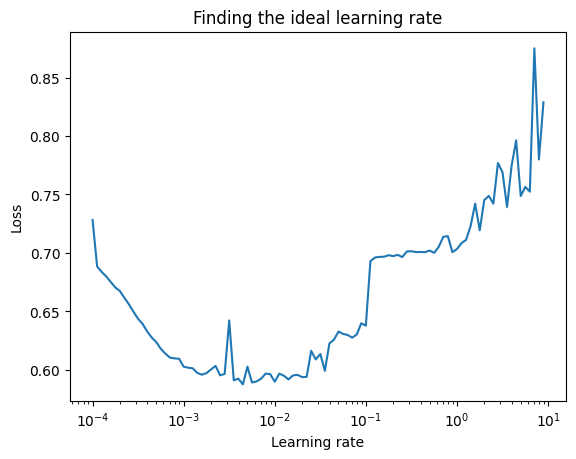

In [98]:
# Visualize loss curve 
lr_data = pd.DataFrame(history_lr.history)
lr = lr_data['lr']
plt.semilogx(lr,lr_data['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [102]:
# Great learning rate is 10**-4, thus lets try to build a model with it 
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])


# Fit the model
history_4  = model_4.fit(X_train_scaled_new,
                        y_train_new,
                        epochs = 30,
                        validation_data = (X_test_scaled_new, y_test_new))

Epoch 1/30
199/199 [==============================] - 2s 4ms/step - loss: 0.7281 - accuracy: 0.5421 - val_loss: 0.6845 - val_accuracy: 0.5584
Epoch 2/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.5449 - val_loss: 0.6825 - val_accuracy: 0.5621
Epoch 3/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6844 - accuracy: 0.5589 - val_loss: 0.6799 - val_accuracy: 0.5647
Epoch 4/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6813 - accuracy: 0.5656 - val_loss: 0.6753 - val_accuracy: 0.5767
Epoch 5/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6779 - accuracy: 0.5793 - val_loss: 0.6740 - val_accuracy: 0.5893
Epoch 6/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6749 - accuracy: 0.5847 - val_loss: 0.6700 - val_accuracy: 0.5874
Epoch 7/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6729 - accuracy: 0.5905 - val_loss: 0.6701 - val_accuracy: 0.5968
Epoch 

50/50 [==============================] - 0s 2ms/step


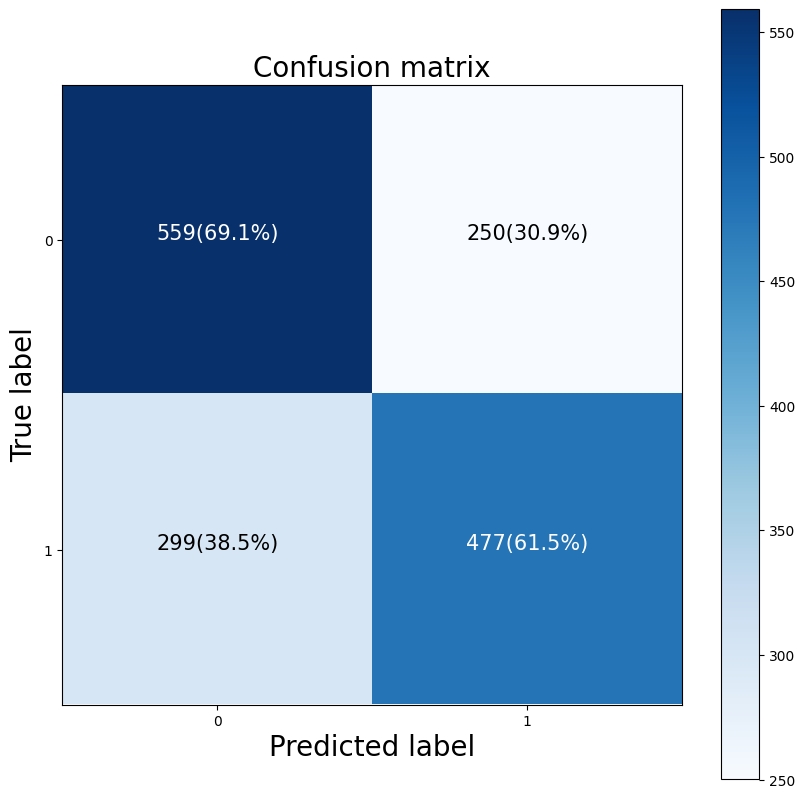

In [108]:
# Plot confusion matrix
y_pred = model_4.predict(X_test_scaled_new)



plot_confusion(y_test_new, y_pred)

<AxesSubplot:>

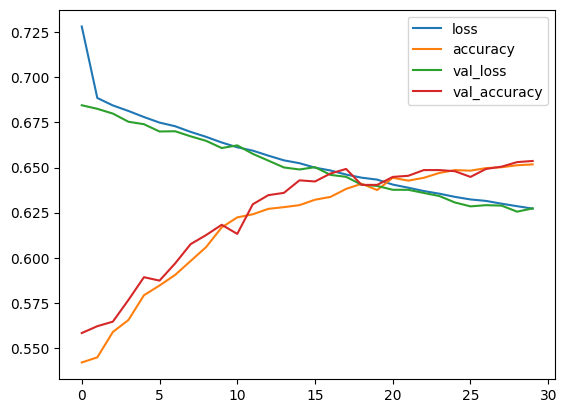

In [109]:
# Plot learning curve 
pd.DataFrame(history_4.history).plot()

In [115]:
# Great learning rate is 10**-4, thus lets try to build a model with it 
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 50 , min_delta=0.0005)


# Fit the model
history_4  = model_4.fit(X_train_scaled_new,
                        y_train_new,
                        epochs = 3000,
                        validation_data = (X_test_scaled_new, y_test_new),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


199/199 [==============================] - 2s 4ms/step - loss: 0.7281 - accuracy: 0.5421 - val_loss: 0.6845 - val_accuracy: 0.5584
Epoch 2/3000
199/199 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.5449 - val_loss: 0.6825 - val_accuracy: 0.5621
Epoch 3/3000
199/199 [==============================] - 1s 4ms/step - loss: 0.6844 - accuracy: 0.5589 - val_loss: 0.6799 - val_accuracy: 0.5647
Epoch 4/3000
199/199 [==============================] - 1s 4ms/step - loss: 0.6813 - accuracy: 0.5656 - val_loss: 0.6753 - val_accuracy: 0.5767
Epoch 5/3000
199/199 [==============================] - 1s 3ms/step - loss: 0.6779 - accuracy: 0.5793 - val_loss: 0.6740 - val_accuracy: 0.5893
Epoch 6/3000
199/199 [==============================] - 1s 7ms/step - loss: 0.6749 - accuracy: 0.5847 - val_loss: 0.6700 - val_accuracy: 0.5874
Epoch 7/3000
199/199 [==============================] - 1s 4ms/step - loss: 0.6729 - accuracy: 0.5905 - val_loss: 0.6701 - val_accuracy: 0.5968
Epoch

<AxesSubplot:>

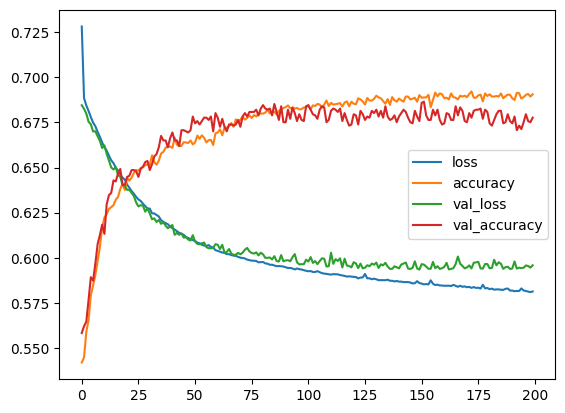

In [116]:
pd.DataFrame(history_4.history).plot()